In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import zipfile, os
import shutil

local_zip = '/content/drive/MyDrive/dataset/skin.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/skin-disease-datasaet'

# Train dan Validasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set ukuran gambar
IMAGE_SIZE = 224

# set batch size
BATCH_SIZE = 16

# set ImageDataGenerator, bagi validasi 40%
image_generator_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

image_generator_test = ImageDataGenerator(
    rescale=1./255,
)

# buat train dataset
train_dataset = image_generator_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=base_dir + '/train_set',
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse'
)

# buat validation dataset
validation_dataset = image_generator_test.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=base_dir + '/test_set',
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse'
)

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [ ]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)

In [ ]:
model=keras.Sequential([
        feature_extractor_layer,
        keras.layers.Dense(8, activation='softmax')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(train_dataset,
          validation_data=validation_dataset,
          epochs=20)

Epoch 1/20
58/58 [==============================] - 17s 186ms/step - loss: 1.4443 - accuracy: 0.5054 - val_loss: 0.9177 - val_accuracy: 0.6996
Epoch 2/20
58/58 [==============================] - 11s 191ms/step - loss: 0.6582 - accuracy: 0.8128 - val_loss: 0.6353 - val_accuracy: 0.7854
Epoch 3/20
58/58 [==============================] - 10s 169ms/step - loss: 0.4842 - accuracy: 0.8496 - val_loss: 0.5719 - val_accuracy: 0.8155
Epoch 4/20
58/58 [==============================] - 11s 179ms/step - loss: 0.3940 - accuracy: 0.8831 - val_loss: 0.4950 - val_accuracy: 0.8412
Epoch 5/20
58/58 [==============================] - 11s 192ms/step - loss: 0.3465 - accuracy: 0.8907 - val_loss: 0.3891 - val_accuracy: 0.8712
Epoch 6/20
58/58 [==============================] - 9s 158ms/step - loss: 0.3157 - accuracy: 0.9069 - val_loss: 0.3441 - val_accuracy: 0.8841
Epoch 7/20
58/58 [==============================] - 11s 192ms/step - loss: 0.2847 - accuracy: 0.9156 - val_loss: 0.3373 - val_accuracy: 0.9013


# Train, Validasi dan Test

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set ukuran gambar
IMAGE_SIZE = 224

# set batch size
BATCH_SIZE = 16

# set ImageDataGenerator
image_generator_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

image_generator_test = ImageDataGenerator(
    rescale=1./255,
)

# buat train dataset
train_dataset = image_generator_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=base_dir + '/train_set',
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    subset='training'
)

# buat validation dataset
validation_dataset = image_generator_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=base_dir + '/train_set',
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse',
    subset='validation'
)

# buat test dataset
test_dataset = image_generator_test.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=base_dir + '/test_set',
    shuffle=False,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='sparse'
)

Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


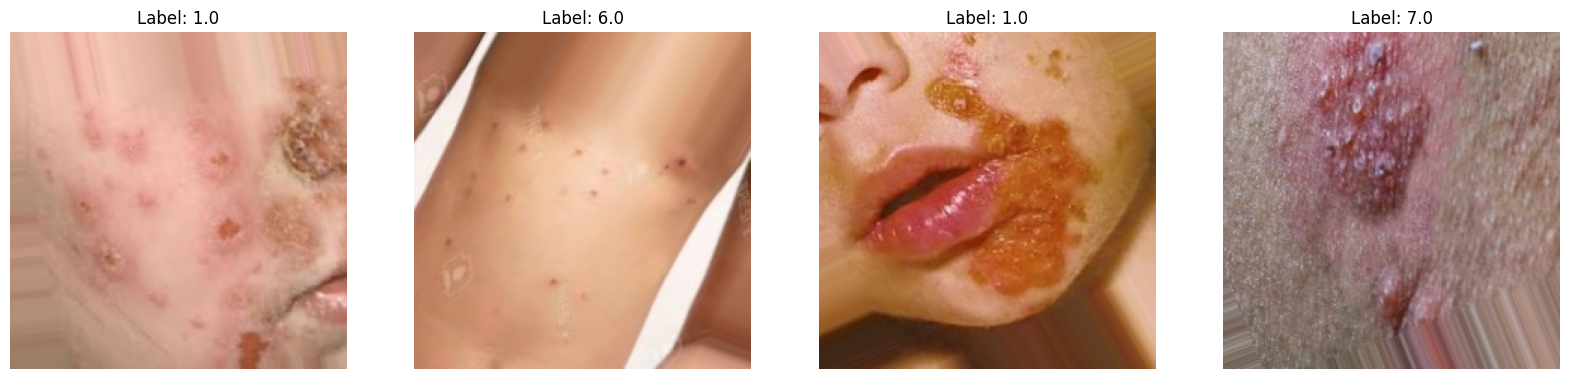

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_dataset)

num_images = 4

fig, axes = plt.subplots(1, num_images, figsize=(20,20))

for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title('Label: ' + str(labels[i]))
    axes[i].axis('off')

plt.show()

In [ ]:
print('Number of batches in train_dataset: ', len(train_dataset))
print('Number of batches in validation_dataset: ', len(validation_dataset))
print('Number of batches in test_dataset: ', len(test_dataset))

Number of batches in train_dataset:  47
Number of batches in validation_dataset:  12
Number of batches in test_dataset:  15


In [ ]:
print('Total number of images in each epoch for train_dataset: ', len(train_dataset) * BATCH_SIZE)
print('Total number of images in each epoch for validation_dataset: ', len(validation_dataset) * BATCH_SIZE)
print('Total number of images in each epoch for test_dataset: ', len(test_dataset) * BATCH_SIZE)

Total number of images in each epoch for train_dataset:  752
Total number of images in each epoch for validation_dataset:  192
Total number of images in each epoch for test_dataset:  240


In [ ]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)

model=tf.keras.Sequential([
        feature_extractor_layer,
        keras.layers.Dense(8, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=20)

Epoch 1/20
47/47 [==============================] - 22s 344ms/step - loss: 1.4187 - accuracy: 0.5493 - val_loss: 0.8406 - val_accuracy: 0.7650
Epoch 2/20
47/47 [==============================] - 13s 285ms/step - loss: 0.6424 - accuracy: 0.8259 - val_loss: 0.6463 - val_accuracy: 0.7978
Epoch 3/20
47/47 [==============================] - 12s 261ms/step - loss: 0.4660 - accuracy: 0.8691 - val_loss: 0.4468 - val_accuracy: 0.8852
Epoch 4/20
47/47 [==============================] - 11s 234ms/step - loss: 0.3792 - accuracy: 0.8974 - val_loss: 0.4375 - val_accuracy: 0.8852
Epoch 5/20
47/47 [==============================] - 12s 262ms/step - loss: 0.2836 - accuracy: 0.9258 - val_loss: 0.3998 - val_accuracy: 0.8907
Epoch 6/20
47/47 [==============================] - 12s 265ms/step - loss: 0.2783 - accuracy: 0.9231 - val_loss: 0.3914 - val_accuracy: 0.8798
Epoch 7/20
47/47 [==============================] - 13s 268ms/step - loss: 0.2527 - accuracy: 0.9271 - val_loss: 0.3515 - val_accuracy: 0.8907

In [ ]:
# VISUALISASI
import matplotlib.pyplot as plt

def visualisasi_training(history):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

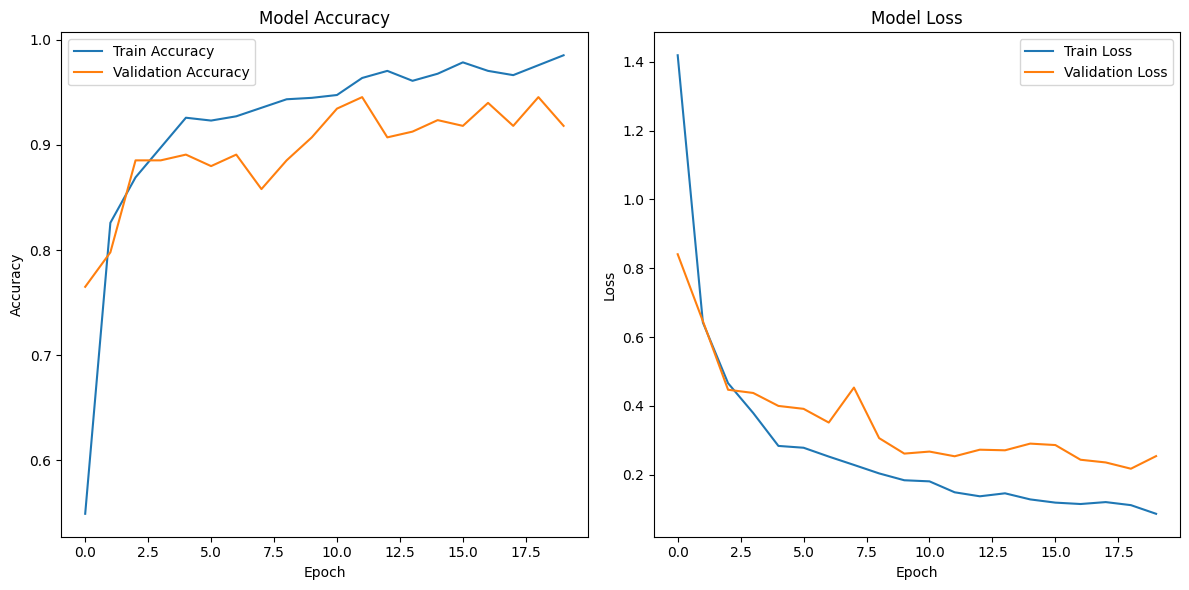

In [ ]:
visualisasi_training(history)

In [ ]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 [==============================] - 1s 90ms/step - loss: 0.1893 - accuracy: 0.9270


[0.1893429011106491, 0.9270386099815369]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_dataset.reset()
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

15/15 [==============================] - 1s 27ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.91      0.97      0.94        33
               BA-impetigo       0.95      0.95      0.95        20
           FU-athlete-foot       0.91      0.97      0.94        32
            FU-nail-fungus       0.94      0.94      0.94        33
               FU-ringworm       0.88      0.96      0.92        23
PA-cutaneous-larva-migrans       0.80      0.80      0.80        25
             VI-chickenpox       1.00      1.00      1.00        34
               VI-shingles       1.00      0.82      0.90        33

                  accuracy                           0.93       233
                 macro avg       0.92      0.93      0.92       233
              weighted avg       0.93      0.93      0.93       233



In [ ]:
confusion_matrix = confusion_matrix(true_classes, predicted_classes)

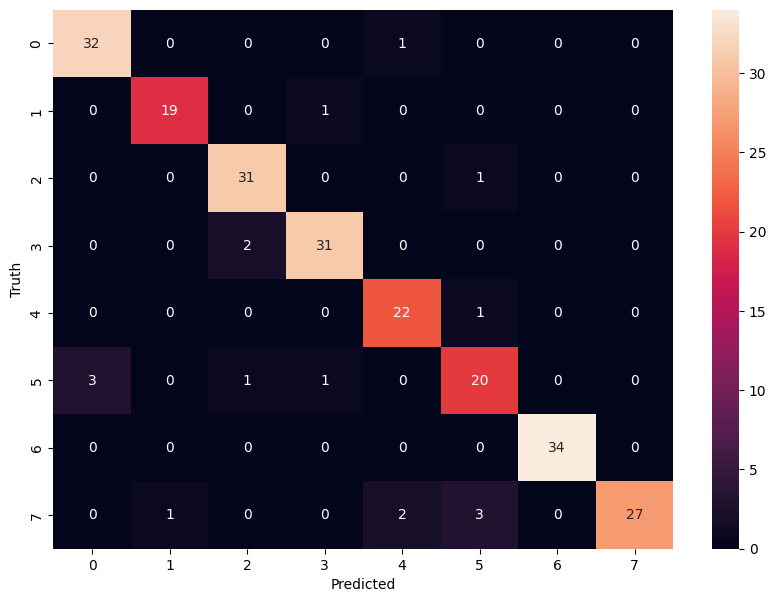

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Saving Athletes-Foot.jpg to Athletes-Foot.jpg
1/1 [==============================] - 0s 142ms/step


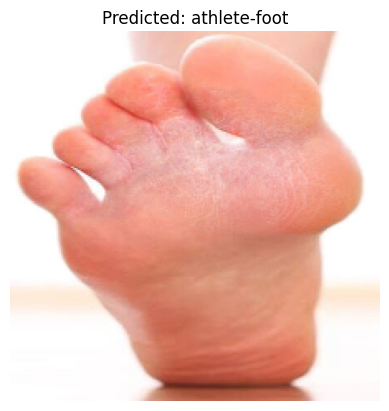

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
import os

def predict_image(model, image_path, class_labels, image_size=224):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(image_size, image_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
    plt.show()
# Define class labels (ensure they match your training data)
class_labels = ['cellulitis', 'impetigo', 'athlete-foot', 'nail-fungus', 'ringworm',
                'cutaneous-larva-migrans', 'chickenpox', 'shingles']

# Upload and predict the image
uploaded = files.upload()
for filename in uploaded.keys():
    predict_image(model, filename, class_labels)

In [ ]:
saved_model_path = "./skin_diseases_model.h5"

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
saved_model_path = "./skin_diseases_model.h5"

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2024-06-09 14:21:49.050342: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 14:21:50.587538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
